In [184]:

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import ppscore as pps
from sklearn.linear_model import LinearRegression

In [74]:
df = pd.read_csv('../../data/by_student_group/grocery_added.csv',low_memory=False)

df.drop(columns=['Unnamed: 0','National School Lunch Program [Public School] 2020-21',
                'County Name_y','District Name_y', 'School Name_y','CDS',"No. of Service Days Req'd"],inplace=True)
df.rename(columns ={'County Name_x':'County_Name','District Name_x':'District_Name',
                    'Lowest Grade Offered [Public School] 2020-21':'Lowest Grade Offered',
                    'School Name_x':'School_Name',
'Total Students, All Grades (Excludes AE) [Public School] 2020-21':'Total_Students(No-AE)',
'Total Students, All Grades (Includes AE) [Public School] 2020-21':'Total_Students(With-AE)',
'Grades 1-8 Students [Public School] 2020-21':'1-8th_Students',
    'Pupil/Teacher Ratio [Public School] 2020-21':'Pupil/Teacher-Ratio',
       'Grades 9-12 Students [Public School] 2020-21':'9-12_Students',
        'Full-Time Equivalent (FTE) Teachers [Public School] 2020-21':'FTE_Teachers',
                    'Hispanic - male [Public School] 2020-21':'Hispanic_Male',
       'Hispanic - female [Public School] 2020-21':'Hispanic_Female',
       'Black or African American - male [Public School] 2020-21':'Black_or_AA_M',
       'Black or African American - female [Public School] 2020-21':'Black_or_AA_F',},inplace=True)
df.shape

(316683, 96)

In [76]:

df[['Total_Students(No-AE)',
       'Total_Students(With-AE)', '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
    
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F']] =df[['Total_Students(No-AE)',
                                                                  
                                                               
       'Total_Students(With-AE)', '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F']].apply(pd.to_numeric,errors='coerce')

In [77]:
dfe= df[df['Grade']==11]

## convert data types and map small categotical values togeather to prep for one hot encoding

In [18]:
dfe['Charter_School'].value_counts()

N    42771
Y    10278
Name: Charter_School, dtype: int64

In [36]:
dfe['Charter_School'] = np.where(dfe['Charter_School']=='N',0,1)
dfe['Charter_School'].value_counts()

<ipython-input-36-31f3bf594246>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['Charter_School'] = np.where(dfe['Charter_School']=='N',0,1)


0    42771
1    14023
Name: Charter_School, dtype: int64

In [43]:

dfe['Education_type'] = pd.Series(dfe['Education_type'], dtype="string")

<ipython-input-43-0ffdcde4c6c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['Education_type'] = pd.Series(dfe['Education_type'], dtype="string")


In [78]:
dfe['Education_type'] = dfe['Education_type'].replace({
                                                   'Community Day School':'other',
                                                   'Opportunity School':'other',
                                                 'Youth Authority School':'other',
                                                  'Special Education School':'other'})

<ipython-input-78-c1a7e6b96f16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['Education_type'] = dfe['Education_type'].replace({


In [96]:
 dfe['School Type [Public School] 2020-21'].value_counts()

1-Regular school              35959
4-Alternative/other school     7697
2-Special education school       37
Name: School Type [Public School] 2020-21, dtype: int64

In [79]:
dfe['Education_type'].value_counts()

Traditional                     44569
Continuation School              4385
Alternative School of Choice     2867
County Community School           626
other                             302
Juvenile Court School             300
Name: Education_type, dtype: int64

In [80]:
dfe['Demographic Name'].value_counts()

Hispanic or Latino                                                  5588
White                                                               3346
All Students                                                        2716
Not armed forces family member                                      2715
Not migrant education                                               2712
Not homeless                                                        2688
IFEP and EO (Initial fluent English proficient and English only)    2657
No reported disabilities                                            2640
Economically disadvantaged                                          2383
Male                                                                2375
EO (English only)                                                   2317
Female                                                              2250
Ever�EL                                                             2049
Not economically disadvantaged                     

In [81]:
dfe['Demographic Name'] = dfe['Demographic Name'].replace({'Native Hawaiian or Pacific Islander':'Asian'})

## need to drop small groups Migrant education

dfe.drop(dfe[dfe['Demographic Name']=='Migrant education'].index,axis=0,inplace=True)
dfe.drop(dfe[dfe['Demographic Name']=='ELs enrolled less than 12 months'].index,axis=0,inplace=True)
dfe.drop(dfe[dfe['Demographic Name']=='American Indian or Alaska Native'].index,axis=0,inplace=True)

<ipython-input-81-3935d2571314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['Demographic Name'] = dfe['Demographic Name'].replace({'Native Hawaiian or Pacific Islander':'Asian'})
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [101]:
 dfe['Low Grade'] =  dfe['Low Grade'].replace(
 {'8':'11 or 8','5':'5,4,3,2,1','4':'5,4,3,2,1','3':'5,4,3,2,1',
  '1':'5,4,3,2,1','2':'5,4,3,2,1','11':'11 or 8'})
dfe['Low Grade'] =pd.Series( dfe['Low Grade'], dtype="string")

<ipython-input-101-4cfc782568e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['Low Grade'] =  dfe['Low Grade'].replace(
<ipython-input-101-4cfc782568e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['Low Grade'] =pd.Series( dfe['Low Grade'], dtype="string")


In [102]:
 dfe['Low Grade'].value_counts()

9            42838
K             6634
6             2297
7             1968
P             1574
10             524
11 or 8        361
5,4,3,2,1      326
Name: Low Grade, dtype: Int64

In [85]:
dfe['Zip_Code'] = pd.Series(dfe['Zip_Code'], dtype="string")
dfe['Zip_Code'].sample(5)
print(dfe.Zip_Code.dtypes)

string


<ipython-input-85-97ce7ef7e932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['Zip_Code'] = pd.Series(dfe['Zip_Code'], dtype="string")


In [88]:

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [75]:
dfe.columns

Index(['County Code', 'District Code', 'School Code', 'Student Group ID',
       'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Grade', 'Test ID',
       'Students Enrolled', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores',
       'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',
       'County_Name', 'District_Name', 'School_Name', 'Zip_Code',
 

In [97]:
df['Test ID'].value_counts()

Mathematics                       160303
English Language Arts/Literacy    156380
Name: Test ID, dtype: int64

In [103]:
model_df['Education_type'].value_counts()

Traditional                     44486
Continuation School              4385
Alternative School of Choice     2867
County Community School           626
other                             302
Juvenile Court School             300
Name: Education_type, dtype: int64

In [106]:
model_df['District Type'] =model_df['District Type'].replace({
    'State Board of Education':'other','Non-School Locations':'other'})

<ipython-input-106-b587f755c70a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['District Type'] =model_df['District Type'].replace({


In [107]:
model_df['District Type'].value_counts()

Unified School District             38866
High School District                13006
County Office of Education (COE)     2545
Elementary School District           1822
other                                 283
Name: District Type, dtype: int64

In [114]:
model_df = dfe[[
    # categorical features
    'County_Name', 'District_Name', 'School_Name', 'Zip_Code',
   'Demographic Name', 'Student Group','District Type','Test ID',
       'School Type', 'Education_type', 'Charter_School',  'Low Grade',
    # target y
    'Mean Scale Score',
    
    'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level',
               'Students Enrolled', 'Students Tested', 
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 
       'Enrollment', 'Free_Meal_count', 'Percent_Eligible',
       'FRPM_Count', 'Percent_Eligible_FRPM',
       'Free_Meal_Count', 'Percent_Eligible_Free', 
         'Latitude', 'Longitude',
       '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
                'Avg_21',
        'Total Salary Schedule FTE', 'Lowest Salary Offered',
       'Average Salary Paid', 'Highest Entry Level Step',
       'Highest Salary Offered', 'Salary at BA+60 Step 10', '2020–21 P‑2 ADA',
       '% Salary Change Over 2019–20', 'EDP 365', 'Current\nExpense ADA',
       'Current\nExpense Per ADA', 'Estimated Total Population',
       'Estimated Population 5-17', 'est_num_u17_pov', 'Grocery_3mile',
       'Grocery_dist'
               ]]

In [128]:
numeric = ['Mean Scale Score',
    'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level',
               'Students Enrolled', 'Students Tested', 
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 
       'Enrollment', 'Free_Meal_count', 'Percent_Eligible',
       'FRPM_Count', 'Percent_Eligible_FRPM',
       'Free_Meal_Count', 'Percent_Eligible_Free', 
         'Latitude', 'Longitude',
       '9-12_Students',
       'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
                'Avg_21',
        'Total Salary Schedule FTE', 'Lowest Salary Offered',
       'Average Salary Paid', 'Highest Entry Level Step',
       'Highest Salary Offered', 'Salary at BA+60 Step 10', '2020–21 P‑2 ADA',
       '% Salary Change Over 2019–20', 'EDP 365', 'Current\nExpense ADA',
       'Current\nExpense Per ADA', 'Estimated Total Population',
       'Estimated Population 5-17', 'est_num_u17_pov', 'Grocery_3mile',
       'Grocery_dist']

In [129]:
model_df[numeric]= model_df[numeric].apply(pd.to_numeric,errors='coerce')

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [62]:
## drop columns not needed for model 

In [117]:
m = pd.DataFrame([model_df.isnull().sum(),100*model_df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(25)

,count,%
Black_or_AA_F,16317.0,28.781839
Asian or Asian/Pacific Islander - female [Public School] 2020-21,15874.0,28.000423
Black_or_AA_M,15817.0,27.899880
Asian or Asian/Pacific Islander - male [Public School] 2020-21,15581.0,27.483596
Pupil/Teacher-Ratio,13304.0,23.467156
9-12_Students,13260.0,23.389543
Hispanic_Male,13260.0,23.389543
Hispanic_Female,13260.0,23.389543
FTE_Teachers,13179.0,23.246666
Latitude,12999.0,22.929161


In [119]:
m = pd.DataFrame([model_df.isnull().sum(),100*model_df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.tail(15)


,count,%
Student Group,0.0,0.0
Students with Scores,0.0,0.0
Test ID,0.0,0.0
Mean Scale Score,0.0,0.0
Total Tested at Reporting Level,0.0,0.0
Total Tested with Scores at Reporting Level,0.0,0.0
Students Enrolled,0.0,0.0
Students Tested,0.0,0.0
Percentage Standard Exceeded,0.0,0.0
Percentage Standard Met,0.0,0.0


In [126]:
model_df.columns

Index(['County_Name', 'District_Name', 'School_Name', 'Zip_Code',
       'Demographic Name', 'Student Group', 'District Type', 'Test ID',
       'School Type', 'Education_type', 'Charter_School', 'Low Grade',
       'Mean Scale Score', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Students Enrolled',
       'Students Tested', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Enrollment', 'Free_Meal_count',
       'Percent_Eligible', 'FRPM_Count', 'Percent_Eligible_FRPM',
       'Free_Meal_Count', 'Percent_Eligible_Free', 'Latitude', 'Longitude',
       '9-12_Students', 'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Isl

In [130]:
cols = model_df[numeric].columns.values
for i in cols:
    model_df[i] = model_df[i].fillna(model_df.groupby(['District_Name'])[i].transform('mean'))
for i in cols:
    model_df[i] = model_df[i].fillna(model_df.groupby(['County_Name'])[i].transform('mean'))


<ipython-input-130-75b0b59f01c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[i] = model_df[i].fillna(model_df.groupby(['District_Name'])[i].transform('mean'))
<ipython-input-130-75b0b59f01c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[i] = model_df[i].fillna(model_df.groupby(['County_Name'])[i].transform('mean'))


In [132]:
m = pd.DataFrame([model_df.isnull().sum(),100*model_df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(20)

,count,%
Charter_School,3726.0,6.572356
School Type,3726.0,6.572356
Education_type,3726.0,6.572356
School_Name,3556.0,6.272490
Zip_Code,3556.0,6.272490
Black_or_AA_M,273.0,0.481549
Black_or_AA_F,266.0,0.469202
District Type,170.0,0.299866
Low Grade,170.0,0.299866
Asian or Asian/Pacific Islander - male [Public School] 2020-21,99.0,0.174628


In [133]:
## the all name blanks were probably the county averages 

print(model_df.shape)
model_df = model_df.dropna(how='any',axis=0)
model_df.shape

(56692, 58)


(52665, 58)

In [134]:
model_df.replace([np.inf, -np.inf], np.nan, inplace=True)

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [135]:
m = pd.DataFrame([model_df.isnull().sum(),100*model_df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(20)

,count,%
County_Name,0.0,0.0
Lowest Salary Offered,0.0,0.0
Longitude,0.0,0.0
9-12_Students,0.0,0.0
FTE_Teachers,0.0,0.0
Pupil/Teacher-Ratio,0.0,0.0
Hispanic_Male,0.0,0.0
Hispanic_Female,0.0,0.0
Black_or_AA_M,0.0,0.0
Black_or_AA_F,0.0,0.0


In [138]:
model_df.columns

Index(['County_Name', 'District_Name', 'School_Name', 'Zip_Code',
       'Demographic Name', 'Student Group', 'District Type', 'Test ID',
       'School Type', 'Education_type', 'Charter_School', 'Low Grade',
       'Mean Scale Score', 'Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Students Enrolled',
       'Students Tested', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Enrollment', 'Free_Meal_count',
       'Percent_Eligible', 'FRPM_Count', 'Percent_Eligible_FRPM',
       'Free_Meal_Count', 'Percent_Eligible_Free', 'Latitude', 'Longitude',
       '9-12_Students', 'FTE_Teachers', 'Pupil/Teacher-Ratio', 'Hispanic_Male',
       'Hispanic_Female', 'Black_or_AA_M', 'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - male [Public School] 2020-21',
       'Asian or Asian/Pacific Isl

In [141]:

       vifs = ['Total Tested with Scores at Reporting Level',
       'Percentage Standard Exceeded',
      'Percentage Standard Met and Above',
      'Percentage Standard Not Met',
'Free_Meal_count',
     
     'Latitude', 
#                'Longitude',
       '9-12_Students', 
               'FTE_Teachers', 
               'Pupil/Teacher-Ratio', 
       'Hispanic_Female',
               'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
       'Avg_21',
       'Average Salary Paid', 
#        'Highest Salary Offered', 
#        '% Salary Change Over 2019–20',
               'EDP 365',
#        'Current\nExpense Per ADA', 
               'Estimated Total Population',
 'est_num_u17_pov', 'Grocery_3mile',
       'Grocery_dist']

In [142]:
vif_df= calculate_vif(model_df[vifs],model_df[vifs].columns.values)
vif_df

,VIF,Tolerance
Total Tested with Scores at Reporting Level,1.161804,0.860730
Percentage Standard Exceeded,6.987273,0.143117
Percentage Standard Met and Above,16.556608,0.060399
Percentage Standard Not Met,7.557902,0.132312
Free_Meal_count,2.351550,0.425251
Latitude,1.665562,0.600398
9-12_Students,22.681715,0.044088
FTE_Teachers,19.615307,0.050981
Pupil/Teacher-Ratio,1.810646,0.552289
Hispanic_Female,5.616070,0.178060


In [150]:

       vifs = ['Total Tested with Scores at Reporting Level',
       'Percentage Standard Exceeded',
#       'Percentage Standard Met and Above',
      'Percentage Standard Not Met',
'Free_Meal_count',
     
     'Latitude', 
#                'Longitude',
#        '9-12_Students', 
               'FTE_Teachers', 
               'Pupil/Teacher-Ratio', 
       'Hispanic_Female',
#                'Hispanic_Male',
               'Black_or_AA_F',
       'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
       'Avg_21',
       'Average Salary Paid', 
#        'Highest Salary Offered', 
#        '% Salary Change Over 2019–20',
#                'EDP 365',
       'Current\nExpense Per ADA', 
#                'Estimated Total Population',
 'est_num_u17_pov', 'Grocery_3mile',
       'Grocery_dist']
vif_df= calculate_vif(model_df[vifs],model_df[vifs].columns.values)
vif_df

,VIF,Tolerance
Total Tested with Scores at Reporting Level,1.162226,0.860418
Percentage Standard Exceeded,2.940093,0.340125
Percentage Standard Not Met,2.619734,0.381718
Free_Meal_count,2.315366,0.431897
Latitude,1.612145,0.620292
FTE_Teachers,5.263334,0.189994
Pupil/Teacher-Ratio,1.481701,0.674900
Hispanic_Female,5.213983,0.191792
Black_or_AA_F,1.368801,0.730566
Asian or Asian/Pacific Islander - female [Public School] 2020-21,2.123329,0.470959


## 'EDP 365', and est_num_u17_pov seem to be highly correlated and had to use Current\nExpense Per ADA, instead 

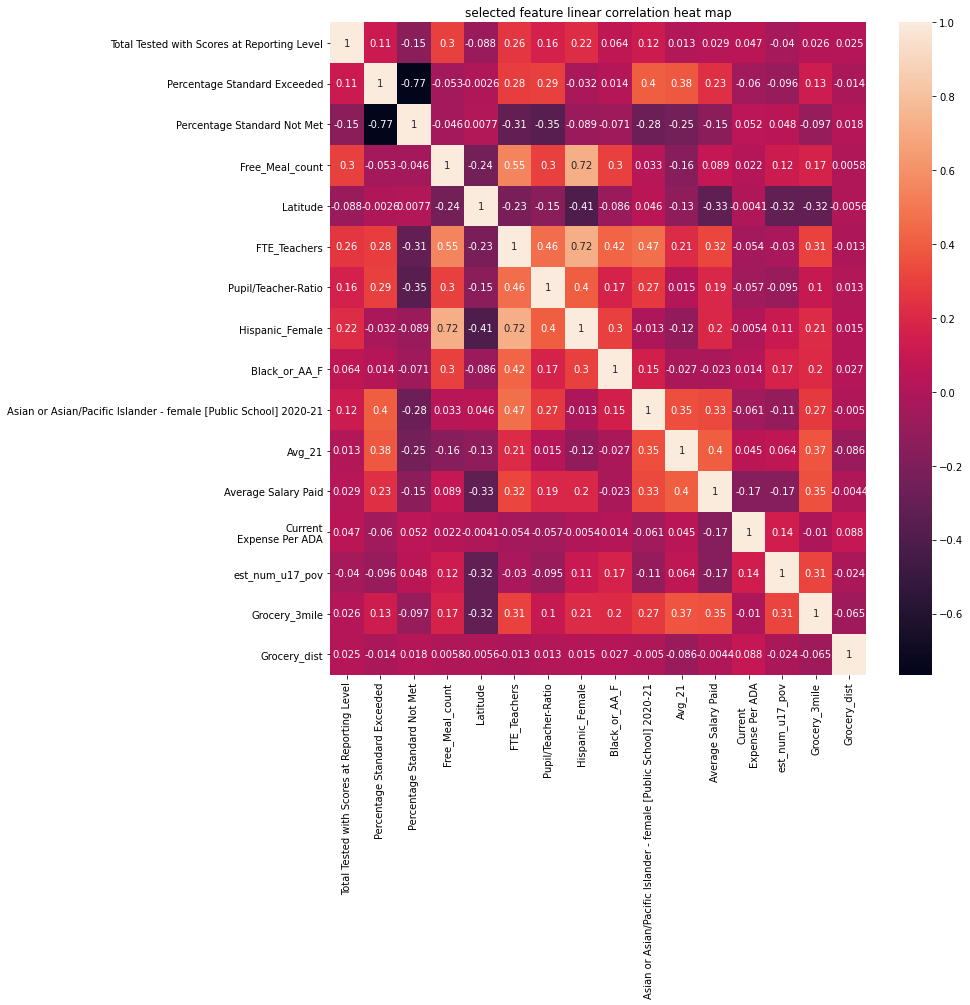

In [152]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sns.heatmap(model_df[vifs].corr(),annot=True)
plt.title('selected feature linear correlation heat map')
plt.show()

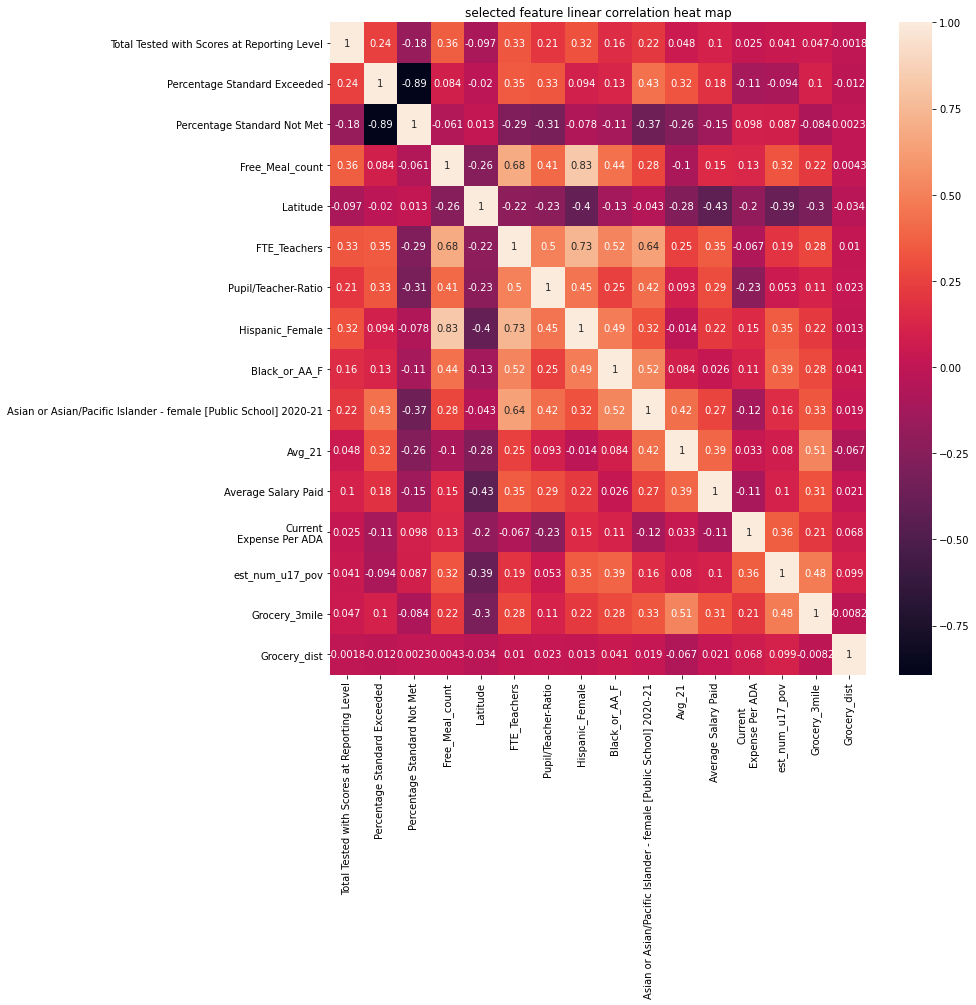

In [153]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sns.heatmap(model_df[vifs].corr(method='spearman'),annot=True)
plt.title('selected feature linear correlation heat map')
plt.show()

In [155]:
pps.score(model_df,'Avg_21','Mean Scale Score')

{'x': 'Avg_21',
 'y': 'Mean Scale Score',
 'ppscore': 0.18683600858506344,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 61.1901,
 'model_score': 49.75758595107911,
 'model': DecisionTreeRegressor()}

In [177]:
pps.score(model_df,'Latitude','Mean Scale Score')


{'x': 'Latitude',
 'y': 'Mean Scale Score',
 'ppscore': 0.2937313321197931,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 61.1901,
 'model_score': 43.21665041445665,
 'model': DecisionTreeRegressor()}

In [183]:
pps.score(model_df,'Longitude','Mean Scale Score')



AttributeError: 'DataFrame' object has no attribute 'score'

In [158]:
help(pps.matrix)

Help on function matrix in module ppscore.calculation:

matrix(df, output='df', sorted=False, **kwargs)
    Calculate the Predictive Power Score (PPS) matrix for all columns in the dataframe
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe that contains the data
    output: str - potential values: "df", "list"
        Control the type of the output. Either return a pandas.DataFrame (df) or a list with the score dicts
    sorted: bool
        Whether or not to sort the output dataframe/list by the ppscore
    kwargs:
        Other key-word arguments that shall be forwarded to the pps.score method,
        e.g. `sample, `cross_validation, `random_seed, `invalid_score`, `catch_errors`
    
    Returns
    -------
    pandas.DataFrame or list of Dict
        Either returns a tidy dataframe or a list of all the PPS dicts. This can be influenced
        by the output argument



In [167]:
vifs

['Total Tested with Scores at Reporting Level',
 'Percentage Standard Exceeded',
 'Percentage Standard Not Met',
 'Free_Meal_count',
 'Latitude',
 'FTE_Teachers',
 'Pupil/Teacher-Ratio',
 'Hispanic_Female',
 'Black_or_AA_F',
 'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
 'Avg_21',
 'Average Salary Paid',
 'Current\nExpense Per ADA',
 'est_num_u17_pov',
 'Grocery_3mile',
 'Grocery_dist']

In [181]:
pps = model_df[['Mean Scale Score','Total Tested with Scores at Reporting Level',
 'Percentage Standard Exceeded',
 'Percentage Standard Not Met',
 'Free_Meal_count',
 'Latitude',
 'FTE_Teachers',
 'Pupil/Teacher-Ratio',
 'Hispanic_Female',
 'Black_or_AA_F',
 'Asian or Asian/Pacific Islander - female [Public School] 2020-21',
 'Avg_21',
 'Average Salary Paid',
 'Current\nExpense Per ADA',
 'est_num_u17_pov',
 'Grocery_3mile',
 'Grocery_dist']]

In [185]:
## use the model and look up the example below to finish
##the pps score for the features 

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
fig = sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('Predictive Power Score')
plt.show()

In [186]:
# matrix = pps.matrix(pps)
# sns.heatmap(matrix)
